# <center> The D-ACO/IDS Project <br>
## <center> (Digital - Ant Colony Optimization/Intrusion Detection System)
### <center> Estudo comparativo com redução de dimencionalidade
#### <center> Feature Selection com PCA

In [1]:
# Importação de modulos Python
import time
import numpy as np
import pandas as pd

In [2]:
# Importação das bibiotecas do Sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn import preprocessing

#Importing Required Libraries and Modules
from sklearn.model_selection import learning_curve

In [3]:
# Importação das bibliotecas Graficas
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt

# Exibe gráficos na página (inline)
%matplotlib inline

In [4]:
seed = 123 # Fixar a semente aleatória dos algoritmos

### Carregando os dados

In [5]:
df = pd.read_csv('../../../datasets/dacoids/botNeTIoT/bestsub/BotNeTIoT_L01_ACO_2023_10_31_05_26_00_selected.csv')
df.head()

,H_L0_1_weight,HH_L0_1_mean,HH_L0_1_std,HH_jit_L0_1_mean,HpHp_L0_1_covariance,HH_L0_1_magnitude,HH_L0_1_covariance,HpHp_L0_1_std,HpHp_L0_1_radius,HH_L0_1_radius,HpHp_L0_1_pcc,HH_jit_L0_1_variance,HH_L0_1_pcc,HpHp_L0_1_magnitude,label
0,1.000000,98.0,0.000000e+00,1.505914e+09,0.0,98.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,98.000000,0
1,1.931640,98.0,1.348699e-06,7.263102e+08,0.0,138.592929,0.0,0.000001,1.818989e-12,1.818989e-12,0.0,5.662344e+17,0.0,138.592929,0
2,2.904273,66.0,0.000000e+00,1.505914e+09,0.0,114.856432,0.0,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,114.856432,0
3,3.902546,74.0,0.000000e+00,1.505914e+09,0.0,74.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,74.000000,0
4,4.902545,74.0,9.536743e-07,7.529571e+08,0.0,74.000000,0.0,0.000000,0.000000e+00,9.094947e-13,0.0,5.669445e+17,0.0,74.000000,0


In [6]:
# Start algorithms time
start_time = time.time()

In [7]:
xData = df.iloc[:, :-1].values
yData = df.iloc[:, -1].values
atributos = xData.shape[1]

In [8]:
print('Atributos do dataframe', atributos)

Atributos do dataframe 14


In [9]:
# Padronizando os dados
scaler = preprocessing.MinMaxScaler(feature_range=(0,1)).fit_transform(xData)
#scaler = preprocessing.StandardScaler().fit_transform(xData)

In [10]:
X = scaler
y = yData

## Classificação e Avaliação dos Dados

In [11]:
# Divivindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.3,
                                                    random_state=seed)

In [12]:
#Dicionário de resultados
dic = {}

### Classificador LDA

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9988    0.9931    0.9959    573924
           1     0.9749    0.9954    0.9851    154049

    accuracy                         0.9936    727973
   macro avg     0.9868    0.9943    0.9905    727973
weighted avg     0.9937    0.9936    0.9936    727973

0.986845529375568
--- Tempo de execução: 7.22 segundos ---


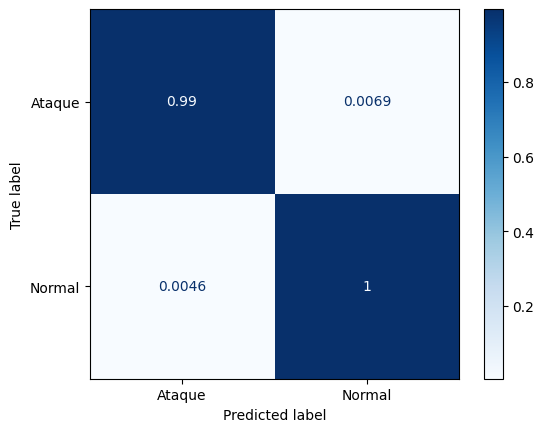

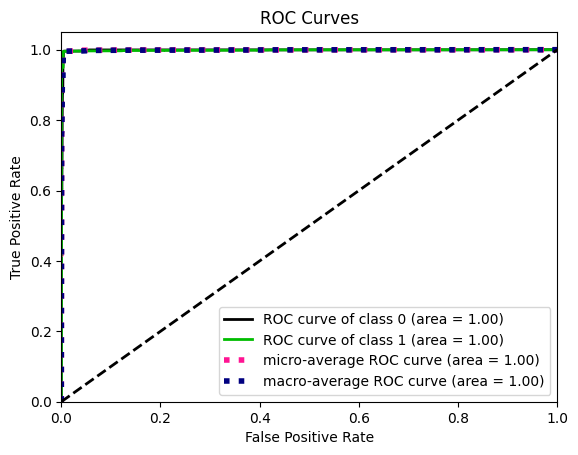

In [13]:
# Start algorithms time PCA/LDA
start_time_lda =  time.time()

# Treinando e avaliando com LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)
lda_pred_proba =lda.predict_proba(X_test)

# Registrando no dicionário
dic["LDA"] = accuracy_score(y_true=y_test,y_pred=lda_pred)

# Extraindo o relatório de classificação
reportLda = classification_report(y_true=y_test,y_pred=lda_pred , output_dict=True, digits=4)

# Imprimindo o relatório de reportLda
print("Relatório de Classificação:\n", classification_report(y_true=y_test,y_pred=lda_pred , digits=4))

macro_avg_precision_LDA = reportLda['macro avg']['precision']
print(macro_avg_precision_LDA)

# Plotando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=lda_pred, cmap=plt.cm.Blues, 
                                        xticks_rotation='horizontal', display_labels = ['Ataque', 'Normal'], normalize='true')

# Plotando a curva ROC
skplt.metrics.plot_roc(y_true=y_test, y_probas=lda_pred_proba)

# Calcula e imprime a duração do PCA/LDA
end_time_lda = time.time() - start_time_lda
print(f'--- Tempo de execução: {end_time_lda:.2f} segundos ---')

### Classificador Regressão Logística 

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9996    0.9992    0.9994    573924
           1     0.9970    0.9985    0.9978    154049

    accuracy                         0.9991    727973
   macro avg     0.9983    0.9989    0.9986    727973
weighted avg     0.9991    0.9991    0.9991    727973

--- Tempo de execução: 10.96 segundos ---


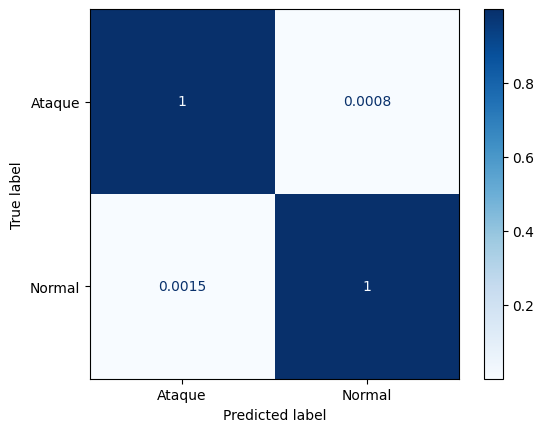

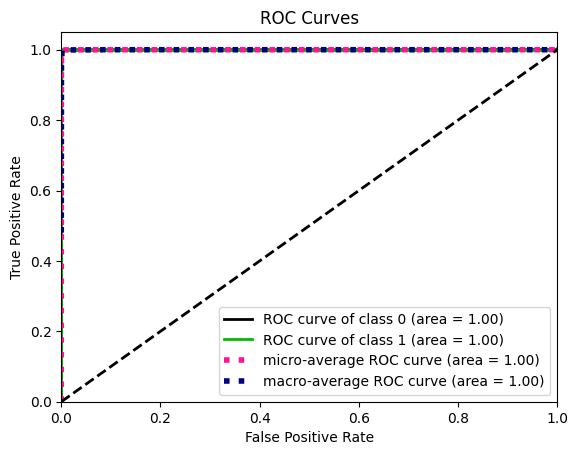

In [14]:
# Start algorithms time PCA/RL
start_time_rl =  time.time()

# Treinando e avaliando com Regressão Logística 
lr = LogisticRegression(max_iter = 300, random_state = seed)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred_proba =lr.predict_proba(X_test)

# Registrando no dicionário
dic["Regressão\nLogistica"] = accuracy_score(y_true=y_test,y_pred=lr_pred)

# Imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_true=y_test,y_pred=lr_pred , digits=4))

# Plotaando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=lr_pred, 
                                        cmap=plt.cm.Blues, xticks_rotation='horizontal', 
                                        display_labels = ['Ataque', 'Normal'], normalize='true')

# Plotando a curva ROC
skplt.metrics.plot_roc(y_true=y_test, y_probas=lr_pred_proba)

# Calcula e imprime a duração do PCA/RL
end_time_rl = time.time() - start_time_rl
print(f'--- Tempo de execução: {end_time_rl:.2f} segundos ---')

### Classificador KNN

Relatório de Classificação:
               precision    recall  f1-score   support

           0     1.0000    0.9999    0.9999    573924
           1     0.9994    0.9999    0.9997    154049

    accuracy                         0.9999    727973
   macro avg     0.9997    0.9999    0.9998    727973
weighted avg     0.9999    0.9999    0.9999    727973

--- Tempo de execução: 365.54 segundos ---


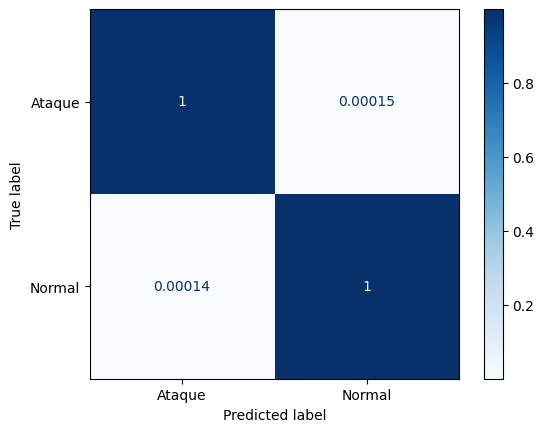

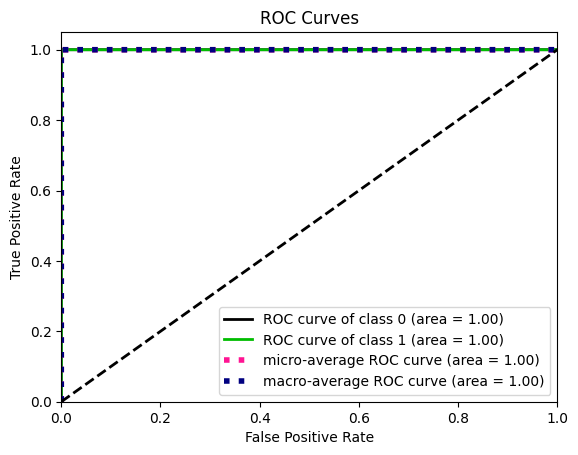

In [15]:
# Start algorithms time PCA/KNN
start_time_knn =  time.time()

# Treinando e avaliando com KNN
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_pred_proba = knn.predict_proba(X_test)

# Registrando no dicionário
dic["KNN"] = accuracy_score(y_true=y_test,y_pred=knn_pred)

# Imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_true=y_test,y_pred=knn_pred, digits=4))

# Plotando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=knn_pred, 
                                        cmap=plt.cm.Blues, xticks_rotation='horizontal', 
                                        display_labels = ['Ataque', 'Normal'], normalize='true')

# Plotando a curva ROC
skplt.metrics.plot_roc(y_true=y_test, y_probas=knn_pred_proba)

# Calcula e imprime a duração do PCA/KNN
end_time_knn = time.time() - start_time_knn
print(f'--- Tempo de execução: {end_time_knn:.2f} segundos ---')

### Classificador Árvore de Decisão

Relatório de Classificação:
               precision    recall  f1-score   support

           0     1.0000    0.9997    0.9999    573924
           1     0.9990    1.0000    0.9995    154049

    accuracy                         0.9998    727973
   macro avg     0.9995    0.9999    0.9997    727973
weighted avg     0.9998    0.9998    0.9998    727973

--- Tempo de execução: 8.14 segundos ---


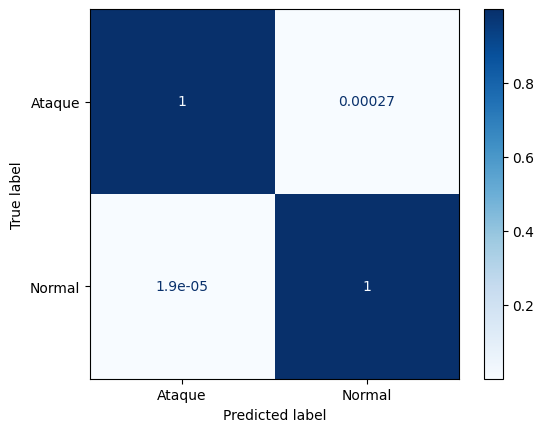

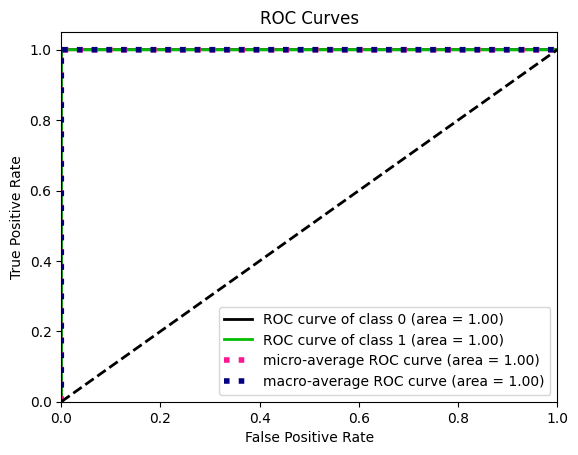

In [16]:
# Start algorithms time PCA/DT
start_time_dt =  time.time()

# Treinando e avaliando com Árvore de Decisão
dt = DecisionTreeClassifier(max_depth = 4, random_state = seed)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_pred_proba = dt.predict_proba(X_test)

# Registrando no dicionário
dic['Árvore de\nDecisão'] = accuracy_score(y_true=y_test,y_pred=dt_pred)

# Imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_true=y_test, y_pred=dt_pred, digits=4))

# Plotando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=dt_pred, 
                                        cmap=plt.cm.Blues, xticks_rotation='horizontal', 
                                        display_labels = ['Ataque', 'Normal'], normalize='true')

# Plotando a curva ROC
skplt.metrics.plot_roc(y_true=y_test, y_probas=dt_pred_proba)

# Calcula e imprime a duração do PCA/DT
end_time_dt = time.time() - start_time_dt
print(f'--- Tempo de execução: {end_time_dt:.2f} segundos ---')

### Classificador Random Forest

Relatório de Classificação:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    573924
           1     0.9999    0.9999    0.9999    154049

    accuracy                         1.0000    727973
   macro avg     0.9999    1.0000    0.9999    727973
weighted avg     1.0000    1.0000    1.0000    727973

--- Tempo de execução: 243.11 segundos ---


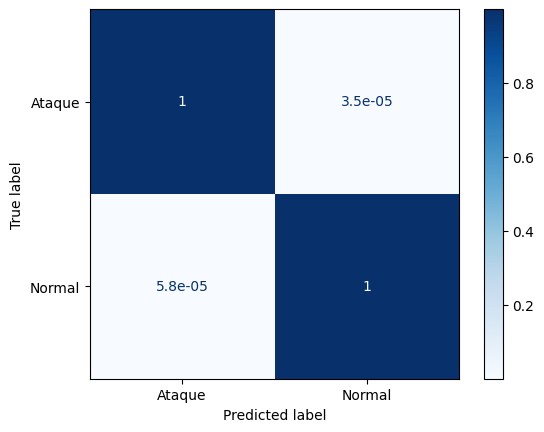

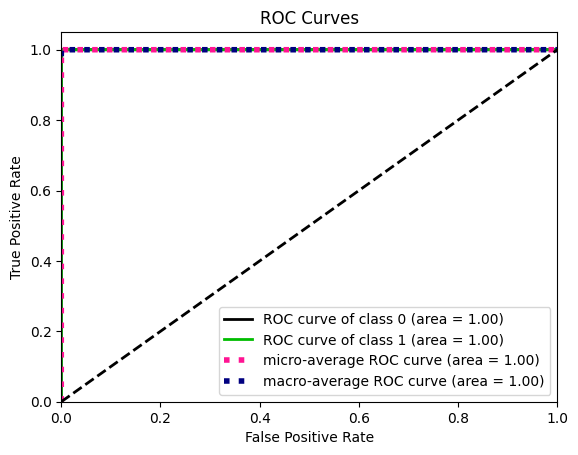

In [17]:
# Start algorithms time PCA/RF
start_time_rf =  time.time()

# Treinando e avaliando com Random Forest
rf = RandomForestClassifier(n_estimators= 100, random_state = seed)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_pred_proba =rf.predict_proba(X_test)

# Registrando no dicionário
dic["Random\nForest"] = accuracy_score(y_true=y_test, y_pred=rf_pred )

# Imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_true=y_test, y_pred=rf_pred, digits=4))

# Plotando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=rf_pred, 
                                        cmap=plt.cm.Blues, xticks_rotation='horizontal', 
                                        display_labels = ['Ataque', 'Normal'], normalize='true')

# Plotando a curva ROC
skplt.metrics.plot_roc(y_true=y_test, y_probas=rf_pred_proba)

# Calcula e imprime a duração do PCA/RF
end_time_rf = time.time() - start_time_rf
print(f'--- Tempo de execução: {end_time_rf:.2f} segundos ---')

### Classificador Naive Bayes

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9000    0.9996    0.9472    573924
           1     0.9973    0.5861    0.7383    154049

    accuracy                         0.9121    727973
   macro avg     0.9486    0.7929    0.8428    727973
weighted avg     0.9206    0.9121    0.9030    727973

--- Tempo de execução: 2.71 segundos ---


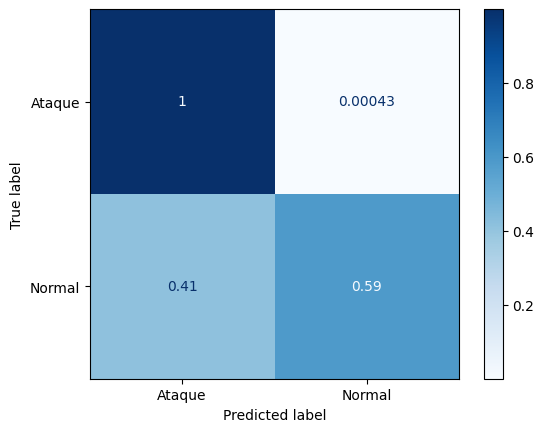

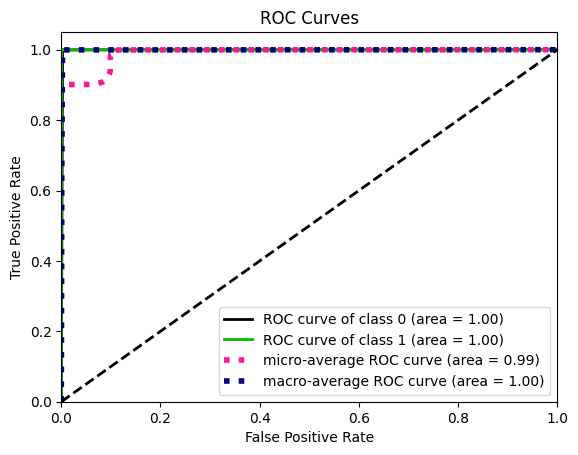

In [18]:
# Start algorithms time PCA/NB
start_time_nb =  time.time()

# Treinando e avaliando com Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_pred_proba = nb.predict_proba(X_test)

# Registrando no dicionário
dic["Naive\nBayes"] = accuracy_score(y_true=y_test, y_pred=nb_pred )

# Imprimindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_true=y_test, y_pred=nb_pred, digits=4))

# Plotando a matrix de confusão
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=nb_pred, 
                                        cmap=plt.cm.Blues, xticks_rotation='horizontal', 
                                        display_labels = ['Ataque', 'Normal'], normalize='true')
# Plotando a curva ROC
skplt.metrics.plot_roc(y_true=y_test, y_probas=nb_pred_proba)

# Calcula e imprime a duração do PCA/NB
end_time_nb = time.time() - start_time_nb
print(f'--- Tempo de execução: {end_time_nb:.2f} segundos ---')

[Text(0, 0, '0.9936'),
 Text(0, 0, '0.9991'),
 Text(0, 0, '0.9999'),
 Text(0, 0, '0.9998'),
 Text(0, 0, '1.0000'),
 Text(0, 0, '0.9121')]

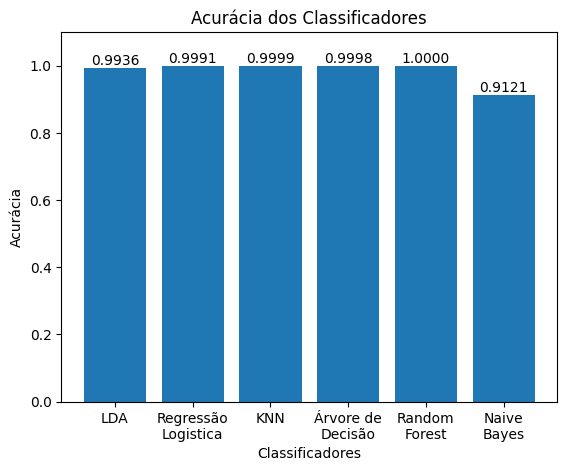

In [19]:
validation = pd.Series(dic, name="Acurácia")
validation

classificadores = dic.keys()
acc = dic.values()

fig, ax = plt.subplots()
bar_container = ax.bar(classificadores, acc)
ax.set(ylabel='Acurácia', xlabel='Classificadores', title='Acurácia dos Classificadores', ylim=(0, 1.1))
ax.bar_label(bar_container, fmt='{:,.4f}')

In [22]:
# Contabiliza o tempo de execução do algoritmo
tempo_total = (time.time() - start_time)
print(f'--- Tempo de execução: {tempo_total:.2f} segundos ---')

--- Tempo de execução: 657.20 segundos ---


## Avaliação com Cross-Validation

In [23]:
# Start algorithms time
start_time_cv = time.time()

In [24]:
X_cv = scaler

In [25]:
#Dicionário de resultados
dic_cv = {}

In [26]:
# Start algorithms time PCA/LDA_CV
start_time_lda_cv =  time.time()

# Treinando e avaliando com LDA
lda = LinearDiscriminantAnalysis()
acc_lda_cv = cross_val_score(lda, X_cv, y, cv=5, n_jobs=-1)

# Registrando no dicionário
dic_cv["Regressão\nLogistica"] = np.mean(acc_lda_cv)

# Imprimindo acurácias de classificação
print("Acurácias - Logistic Regression: ", acc_lda_cv)
print("Acurácia Final - Logistic Regression: ", np.mean(acc_lda_cv), "+-", np.std(acc_lda_cv))

# Calcula e imprime a duração do PCA/LDA/CV
end_time_lda_cv = time.time() - start_time_lda_cv
print(f'--- Tempo de execução: {end_time_lda_cv:.2f} segundos ---')

Acurácias - Logistic Regression:  [0.97837693 0.99955493 0.99908925 0.99520518 0.99428617]
Acurácia Final - Logistic Regression:  0.99330249190162 +- 0.0077451890319498624
--- Tempo de execução: 15.46 segundos ---


In [27]:
# Start algorithms time PCA/RL/CV
start_time_rl_cv =  time.time()

# Treinando e avaliando com regressão logística 
lr = LogisticRegression(max_iter = 300, random_state = seed)
acc_lr_cv = cross_val_score(lr, X_cv, y, cv=5, n_jobs=-1)

# Registrando no dicionário
dic_cv["Regressão\nLogistica"] = np.mean(acc_lr_cv)

# Imprimindo acurácias de classificação
print("Acurácias - Logistic Regression: ", acc_lr_cv)
print("Acurácia Final - Logistic Regression: ", np.mean(acc_lr_cv), "+-", np.std(acc_lr_cv))

# Calcula e imprime a duração do PCA/RL/CV
end_time_rl_cv = time.time() - start_time_rl_cv
print(f'--- Tempo de execução: {end_time_rl_cv:.2f} segundos ---')

Acurácias - Logistic Regression:  [0.99166315 0.99988873 0.99968474 0.99812287 0.99830831]
Acurácia Final - Logistic Regression:  0.9975335599799354 +- 0.0030193937360558304
--- Tempo de execução: 26.43 segundos ---


In [28]:
# Start algorithms time PCA/KNN/CV
start_time_knn_cv =  time.time()

# Treinando e avaliando com KNN
knn = KNeighborsClassifier(n_neighbors = 7)
acc_knn_cv = cross_val_score(knn, X_cv, y, cv=5, n_jobs=-1)

# Registrando no dicionário
dic_cv["KNN"] = np.mean(acc_knn_cv)

# Imprimindo acurácias de classificação
print("Acurácias - KNN: ", acc_knn_cv)
print("Acurácia Final - KNN: ", np.mean(acc_knn_cv), "+-", np.std(acc_knn_cv))

# Calcula e imprime a duração do PCA/KNN/CV
end_time_knn_cv = time.time() - start_time_knn_cv
print(f'--- Tempo de execução: {end_time_knn_cv:.2f} segundos ---')

Acurácias - KNN:  [0.99662487 0.99996291 0.99959408 0.99964559 0.99275108]
Acurácia Final - KNN:  0.9977157074275821 +- 0.002761885132420835
--- Tempo de execução: 223.76 segundos ---


In [29]:
# Start algorithms time PCA/DT/CV
start_time_dt_cv =  time.time()

# Treinando e avaliando com árvore de decisão
dt = DecisionTreeClassifier(max_depth = 4, random_state = seed)
acc_dt_cv = cross_val_score(dt, X_cv, y, cv=5, n_jobs=-1)

# Registrando no dicionário
dic_cv['Árvore de\nDecisão'] =  np.mean(acc_dt_cv)

# Imprimindo acurácias de classificação
print("Acurácias - Árvore de Decisão: ", acc_dt_cv)
print("Acurácia Final - Árvore de Decisão: ", np.mean(acc_dt_cv), "+-", np.std(acc_dt_cv))

# Calcula e imprime a duração do PCA/DT/CV
end_time_dt_cv = time.time() - start_time_dt_cv
print(f'--- Tempo de execução: {end_time_lda_cv:.2f} segundos ---')

Acurácias - Árvore de Decisão:  [0.9992644  0.99998352 0.9999114  0.99897386 0.9985803 ]
Acurácia Final - Árvore de Decisão:  0.9993426943656392 +- 0.0005399051420241412
--- Tempo de execução: 15.46 segundos ---


In [30]:
# Start algorithms time PCA/RF/CV
start_time_rf_cv =  time.time()

# Treinando uma floresta aleatória
rf = RandomForestClassifier(n_estimators= 100, random_state = seed)
acc_rf_cv = cross_val_score(rf, X_cv, y, cv=5, n_jobs=-1)

# Avaliando a florest aleatória e anotando no dicionário
dic_cv["Random\nForest"] = np.mean(acc_rf_cv)

# Imprimindo acurácias de classificação
print("Acurácias - Random Forest: ", acc_rf_cv)
print("Acurácia Final - Random Forest: ", np.mean(acc_rf_cv), "+-", np.std(acc_rf_cv))

# Calcula e imprime a duração do PCA/LDA/CV
end_time_rf_cv = time.time() - start_time_rf_cv
print(f'--- Tempo de execução: {end_time_rf_cv:.2f} segundos ---')

Acurácias - Random Forest:  [0.99930973 1.         0.99998146 0.99989079 0.99976716]
Acurácia Final - Random Forest:  0.9997898271296626 +- 0.0002538102557266313
--- Tempo de execução: 412.09 segundos ---


In [31]:
# Start algorithms time PCA/NB/CV
start_time_nb_cv =  time.time()

# Treinando com Naive Bayes
nb = GaussianNB()
acc_nb_cv = cross_val_score(nb, X_cv, y, cv=5, n_jobs=-1)

#Avaliando o Naive Bayes e anotando no dicionário
dic_cv["Naive\nBayes"] = np.mean(acc_nb_cv)

# Imprimindo acurácias de classificação
print("Acurácias - Naive Bayes: ", acc_nb_cv)
print("Acurácia Final - Naive Bayes: ", np.mean(acc_nb_cv), "+-", np.std(acc_nb_cv))

# Calcula e imprime a duração do PCA/LDA/CV
end_time_nb_cv = time.time() - start_time_nb_cv
print(f'--- Tempo de execução: {end_time_nb_cv:.2f} segundos ---')

Acurácias - Naive Bayes:  [0.89941172 0.94074776 0.92315506 0.9058426  0.89989162]
Acurácia Final - Naive Bayes:  0.9138097523841697 +- 0.015984270656929932
--- Tempo de execução: 3.25 segundos ---


[Text(0, 0, '0.9975'),
 Text(0, 0, '0.9977'),
 Text(0, 0, '0.9993'),
 Text(0, 0, '0.9998'),
 Text(0, 0, '0.9138')]

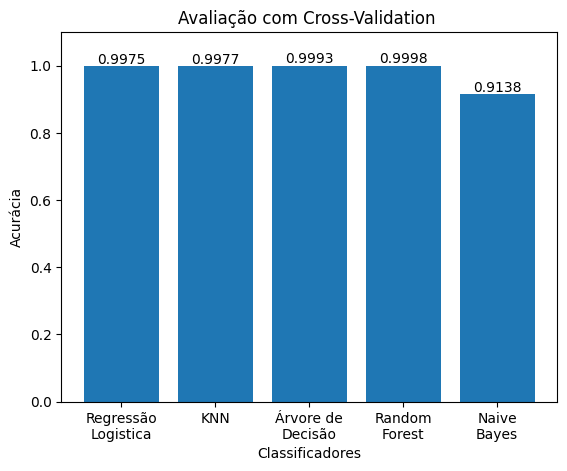

In [32]:
validation2 = pd.Series(dic_cv, name="Acurácia")
validation2

classif = dic_cv.keys()
acc_cv = dic_cv.values()

fig, ax = plt.subplots()
bar_container = ax.bar(classif, acc_cv)
ax.set(ylabel='Acurácia', xlabel='Classificadores', title='Avaliação com Cross-Validation ', ylim=(0, 1.1))
ax.bar_label(bar_container, fmt='{:,.4f}')

In [35]:
# Contabiliza o tempo de execução do algoritmo
end_time_cv = (time.time() - start_time_cv)
print(f'--- Tempo de execução: {end_time_cv:.2f} segundos ---')

--- Tempo de execução: 3844.47 segundos ---
